# Cogs 109: Modeling and Data Analysis
## Final project guidelines, 2019

Work in teams of at least 2 and no more than 4 students. Every student in the group will be expected to contribute substantially to the final product(s), and all students should be able to understand and explain all aspects of the project when you present your work in the final symposium.

Your project should. 
- Identify a real problem, challenge or scientific question which could benefit from data analysis and modeling. Your final report must explain why the question is interesting or important. 
- Identify a relevant data set. You should learn about how the data was collected and be able to explain key features of the data, for example: How many observations? What are the noise sources? What are the relevant predictors?
Identify at least one relevant data analysis approach, choosing from the methods covered in the course (linear or nonlinear regression, classification, clustering, PCA, etc.). Explain why this analysis approach is appropriate for addressing your question.
- Identify and explain one or more hypotheses or initial expectation that you will test using the data.
- Model selection: You should compare and contrast multiple different models (at least 2, but usually more). Your comparison should make use of cross-validation, bootstrap sampling, regularization, and/or other relevant techniques. For example, you might compare K-Nearest Neighbors classification for a range of k values (k=1,2,…,50), and select the k value that provides the lowest test set (cross-validation) error.
- Model estimation: Implement your data analysis and present the results using a combination of data visualizations (box plots, scatter plots), statistical analyses and models.
- Present your conclusions and outlook for next steps/future directions.

The final product will be a written report, 5-10 pages in length. In addition, you will create a poster explaining your project to be presented in a symposium session on the last day of class. We will provide more information about the final paper and poster in a few weeks.


## Written report:
Your final report must include the following sections (use these headings).
- Introduction. 
    - Define the real problem and explain its motivation
    - Identify the dataset you will use and explain its key characteristics.
    - Explain at least one hypothesis that you will test.
- Methods. Identify the data analysis approach you will use and explain the rationale/motivation for your choice of this approach.
- Results
    - Model selection. You MUST compare at least 2 models, using cross-validation, regularization, and/or other relevant techniques.
    - Model estimation. What are the final parameter estimates? What is the final accuracy of the model’s predictions?
    - Conclusions and discussion. What can you conclude about your hypothesis? (Note that negative or ambiguous results are perfectly acceptable, you just need to explain what you found.) What are some potential implications/next steps for researchers interested in this topic?


In [48]:
import requests
import time
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy import linalg
from sklearn.linear_model import Ridge
from pytrends.request import TrendReq
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [49]:
# Define company variables
companies = ['tesla', 'facebook', 'microsoft', 'amazon', 'google', 'uber', 'lyft', 'apple', 'snap']
key_terms = ['report', 'good', 'bad', 'up', 'down', 'stock']
company_symbol = ['TSLA', 'FB', 'MSFT', 'AMZN', 'GOOGL', 'UBER', 'LYFT', 'AAPL', 'SNAP']

In [104]:
# create kw_list 
kw_list = []
for c_name in companies:
    for k in key_terms:
        kw_list.append(c_name + " " + k)

In [148]:
# get google trends data from pytrends
df = pd.DataFrame()
pytrends = TrendReq(hl='en-US', tz=360)
for kw in kw_list:
    print(kw)
    df_temp = pytrends.get_historical_interest([kw], year_start=2019, month_start=11, day_start=18, hour_start=0, year_end=2019, month_end=11, day_end=22, hour_end=23, cat=0, geo='', gprop='')
    df_temp = df_temp.drop(['isPartial'], axis=1)
    if df.empty:
        df = df_temp
    else:
        df = df.join(df_temp)

tesla report
tesla good
tesla bad
tesla up
tesla down
tesla stock
facebook report
facebook good
facebook bad
facebook up
facebook down
facebook stock
microsoft report
microsoft good
microsoft bad
microsoft up
microsoft down
microsoft stock
amazon report
amazon good
amazon bad
amazon up
amazon down
amazon stock
google report
google good
google bad
google up
google down
google stock
uber report
uber good
uber bad
uber up
uber down
uber stock
lyft report
lyft good
lyft bad
lyft up
lyft down
lyft stock
apple report
apple good
apple bad
apple up
apple down
apple stock
snap report
snap good
snap bad
snap up
snap down
snap stock


In [149]:
print(df.head())
print(df.shape)
print(df.index)

                     tesla report  tesla good  tesla bad  tesla up  \
date                                                                 
2019-11-18 00:00:00            19          19          7         6   
2019-11-18 01:00:00            17          21         16         6   
2019-11-18 02:00:00             9          16          9         5   
2019-11-18 03:00:00            20          14         10         5   
2019-11-18 04:00:00            17          18         10         5   

                     tesla down  tesla stock  facebook report  facebook good  \
date                                                                           
2019-11-18 00:00:00          12            5               85             88   
2019-11-18 01:00:00          13            5               83             85   
2019-11-18 02:00:00          21            6               74             90   
2019-11-18 03:00:00          15            6               79             97   
2019-11-18 04:00:00          

In [150]:
# worldTradingData_APIKey = ''
# def getWorldTradingData_Intraday1min(symbol, days=1, interval=1) :
#     # limits on the inputs https://www.worldtradingdata.com/documentation#stock-and-index-intraday
#     link = "https://intraday.worldtradingdata.com/api/v1/intraday?symbol={}&range={}&interval={}&api_token={}"\
#         .format(symbol, days, interval, worldTradingData_APIKey)
#     request = requests.get(link)
#     data = json.loads(request.text)
#     if 'intraday' not in data:
#         return pd.DataFrame()
#     stock_data = json.dumps(data["intraday"])
#     df = pd.read_json(stock_data).transpose()
#     cols = ['open', 'high', 'low', 'close', 'volume']
#     df = df[cols]
#     df.reset_index(level=0, inplace=True)
#     df.columns = ['times', 'open', 'high', 'low', 'close', 'volume']
#     return df

In [143]:
# # getting data from World Tradiing Data
# df_stocks = {}
# for s in company_symbol:
#     print(s)
#     res = getWorldTradingData_Intraday1min(s)
#     while res.empty:
#         time.sleep(10)
#         res = getWorldTradingData_Intraday1min(s)
#     df_stocks[s] = getWorldTradingData_Intraday1min(s)

In [144]:
ts = 'TIME_SERIES_INTRADAY'#'TIME_SERIES_DAILY'
interval = '30min'
api_key = '' 
outputsize = 'full' # compact=100 results, full= all data (5 days?)
def getIntraday1minDF(symbol): 
    link = 'https://www.alphavantage.co/query?function={}&symbol={}&interval={}&apikey={}&outputsize={}'\
        .format(ts, symbol, interval, api_key, outputsize)
    request = requests.get(link)
    data = json.loads(request.text)
    if "Time Series (30min)" not in data:
        print("data limit reached")
        return pd.DataFrame()
    stock_data = json.dumps(data["Time Series (30min)"])
    df = pd.read_json(stock_data).transpose()
    cols = ['1. open', '2. high', '3. low', '4. close', '5. volume']
    df = df[cols]
    df.reset_index(level=0, inplace=True)
    df.columns = ['times', 'open', 'high', 'low', 'close', 'volume']
    return df

In [145]:
df_stocks = {}
for s in company_symbol:
    print(s)
    res = getIntraday1minDF(s)
    while res.empty:
        time.sleep(10)
        res = getIntraday1minDF(s)
    df_stocks[s] = res

TSLA
FB
MSFT
AMZN
GOOGL
UBER
LYFT
AAPL
SNAP
data limit reached
data limit reached
data limit reached
data limit reached
data limit reached


In [174]:
# join Google Trends Data with Stock Market Data
df_trends_stocks = {}
def cleanAndJoinData():
    for s,c in zip(company_symbol, companies):
        print(c)
        company_names = [x for x in list(df.columns.values) if c in x]
        df_temp_trends = df[company_names]
        
        # line up indexes 
        stock_times = list(df_stocks[s].times)
        trends_times = list(df_temp_trends.index)
        joint_times = list(set(stock_times) & set(trends_times)) 
        
        
        df_temp_stocks = df_stocks[s].loc[df_stocks[s]['times'].isin(joint_times)]
        df_temp_stocks = df_temp_stocks.reset_index()
        df_temp_stocks = df_temp_stocks.iloc[::-1]
        df_temp_trends = df_temp_trends.loc[df_temp_trends.index.isin(joint_times)]
        df_temp_trends = df_temp_trends.reset_index()
        df_temp_trends.columns = ['_'.join(x.split()) for x in list(df_temp_trends.columns) if len(x) > 1]
        df_trends_stocks[c] = df_temp_stocks.join(df_temp_trends)
cleanAndJoinData()

tesla
facebook
microsoft
amazon
google
uber
lyft
apple
snap


In [175]:
#check this is populated
print(df_trends_stocks['tesla'].head())

    index               times    open     high      low   close    volume  \
34    103 2019-11-18 10:00:00  352.92  353.170  348.500  350.62  880502.0   
33    101 2019-11-18 11:00:00  350.20  350.380  348.581  348.68  396033.0   
32     99 2019-11-18 12:00:00  347.86  348.900  347.374  348.74  234635.0   
31     97 2019-11-18 13:00:00  347.29  348.260  346.880  348.23  202193.0   
30     95 2019-11-18 14:00:00  348.72  350.051  348.680  349.49  236589.0   

                  date  tesla_report  tesla_good  tesla_bad  tesla_up  \
34 2019-11-22 16:00:00           100          87         81        85   
33 2019-11-22 15:00:00            77          72         81        82   
32 2019-11-22 14:00:00            76          65         71        81   
31 2019-11-22 13:00:00            76          54         51        78   
30 2019-11-22 12:00:00            54          35         46        82   

    tesla_down  tesla_stock  
34          82           89  
33          85          100  
32      

In [177]:
train_size = 28
train_data = {}
test_data = {}
for c in companies:
    train_temp = df_trends_stocks[c][:train_size]
    test_temp = df_trends_stocks[c][train_size:]
    train_data[c] = train_temp
    test_data[c] = test_temp

In [178]:
# Testing using Keras 

In [206]:
#scale data to be between 0-1 
def predictCompany(company_name, train_size):
    df_temp = df_trends_stocks[company_name]
    df_temp['mid'] = (df_temp['high'] - df_temp['low']) / 2
    cols = [company_name+'_'+ x for x in key_terms]
    sc = MinMaxScaler(feature_range = (0, 1))
    data_set_scaled = sc.fit_transform(df_temp[cols+['mid']])
    
    #split training data 
    train = data_set_scaled[:train_size, :]
    test = data_set_scaled[train_size:, :]
    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    
    #create model
    model = Sequential()
    model.add(LSTM(train_size, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    
    #train model
    history = model.fit(train_X, train_y, epochs=500, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    return history, model, train_X, train_y, test_X, test_y

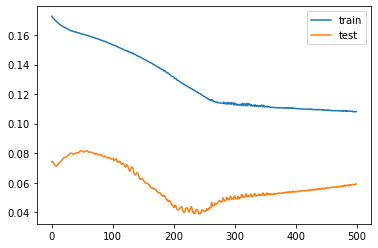

In [208]:
def plotHistory(history):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()
plotHistory(history)

In [209]:
def plotPrediction(company, train_size, model, train_X, train_y, test_X, test_y):
    plt.plot(range(len(train_y)+len(test_y)) , list(np.array(train_y))+list(np.array(test_y)), range(len(train_y)), model.predict(train_X), '-', range(len(train_y), len(train_y)+len(test_y)), model.predict(test_X), '-')
    plt.xlabel('Day')
    plt.ylabel('Profit from previous day')
    plt.title('FB Keras - Stock Market Mid per Day from 3 months until today')
    plt.legend(["True Data","Training Data - Price change prediction", "Testing Data - Price change prediction"])
    plt.show()

In [212]:
history, model, train_X, train_y, test_X, test_y = predictCompany('google',28)

Train on 28 samples, validate on 7 samples
Epoch 1/500
 - 1s - loss: 0.1738 - val_loss: 0.0759
Epoch 2/500
 - 0s - loss: 0.1725 - val_loss: 0.0733
Epoch 3/500
 - 0s - loss: 0.1716 - val_loss: 0.0714
Epoch 4/500
 - 0s - loss: 0.1710 - val_loss: 0.0716
Epoch 5/500
 - 0s - loss: 0.1707 - val_loss: 0.0714
Epoch 6/500
 - 0s - loss: 0.1703 - val_loss: 0.0710
Epoch 7/500
 - 0s - loss: 0.1698 - val_loss: 0.0704
Epoch 8/500
 - 0s - loss: 0.1693 - val_loss: 0.0696
Epoch 9/500
 - 0s - loss: 0.1687 - val_loss: 0.0688
Epoch 10/500
 - 0s - loss: 0.1681 - val_loss: 0.0678
Epoch 11/500
 - 0s - loss: 0.1675 - val_loss: 0.0681
Epoch 12/500
 - 0s - loss: 0.1668 - val_loss: 0.0684
Epoch 13/500
 - 0s - loss: 0.1663 - val_loss: 0.0684
Epoch 14/500
 - 0s - loss: 0.1657 - val_loss: 0.0683
Epoch 15/500
 - 0s - loss: 0.1651 - val_loss: 0.0683
Epoch 16/500
 - 0s - loss: 0.1645 - val_loss: 0.0695
Epoch 17/500
 - 0s - loss: 0.1642 - val_loss: 0.0706
Epoch 18/500
 - 0s - loss: 0.1639 - val_loss: 0.0715
Epoch 19/500

Epoch 154/500
 - 0s - loss: 0.1453 - val_loss: 0.0699
Epoch 155/500
 - 0s - loss: 0.1451 - val_loss: 0.0698
Epoch 156/500
 - 0s - loss: 0.1449 - val_loss: 0.0695
Epoch 157/500
 - 0s - loss: 0.1447 - val_loss: 0.0693
Epoch 158/500
 - 0s - loss: 0.1445 - val_loss: 0.0689
Epoch 159/500
 - 0s - loss: 0.1443 - val_loss: 0.0685
Epoch 160/500
 - 0s - loss: 0.1441 - val_loss: 0.0680
Epoch 161/500
 - 0s - loss: 0.1439 - val_loss: 0.0679
Epoch 162/500
 - 0s - loss: 0.1437 - val_loss: 0.0677
Epoch 163/500
 - 0s - loss: 0.1435 - val_loss: 0.0674
Epoch 164/500
 - 0s - loss: 0.1433 - val_loss: 0.0671
Epoch 165/500
 - 0s - loss: 0.1431 - val_loss: 0.0667
Epoch 166/500
 - 0s - loss: 0.1429 - val_loss: 0.0668
Epoch 167/500
 - 0s - loss: 0.1426 - val_loss: 0.0672
Epoch 168/500
 - 0s - loss: 0.1424 - val_loss: 0.0674
Epoch 169/500
 - 0s - loss: 0.1423 - val_loss: 0.0671
Epoch 170/500
 - 0s - loss: 0.1420 - val_loss: 0.0667
Epoch 171/500
 - 0s - loss: 0.1419 - val_loss: 0.0666
Epoch 172/500
 - 0s - loss: 

Epoch 306/500
 - 0s - loss: 0.1159 - val_loss: 0.0469
Epoch 307/500
 - 0s - loss: 0.1158 - val_loss: 0.0465
Epoch 308/500
 - 0s - loss: 0.1159 - val_loss: 0.0481
Epoch 309/500
 - 0s - loss: 0.1160 - val_loss: 0.0482
Epoch 310/500
 - 0s - loss: 0.1160 - val_loss: 0.0470
Epoch 311/500
 - 0s - loss: 0.1156 - val_loss: 0.0456
Epoch 312/500
 - 0s - loss: 0.1163 - val_loss: 0.0468
Epoch 313/500
 - 0s - loss: 0.1155 - val_loss: 0.0498
Epoch 314/500
 - 0s - loss: 0.1164 - val_loss: 0.0499
Epoch 315/500
 - 0s - loss: 0.1163 - val_loss: 0.0475
Epoch 316/500
 - 0s - loss: 0.1153 - val_loss: 0.0451
Epoch 317/500
 - 0s - loss: 0.1164 - val_loss: 0.0453
Epoch 318/500
 - 0s - loss: 0.1162 - val_loss: 0.0478
Epoch 319/500
 - 0s - loss: 0.1152 - val_loss: 0.0497
Epoch 320/500
 - 0s - loss: 0.1157 - val_loss: 0.0492
Epoch 321/500
 - 0s - loss: 0.1155 - val_loss: 0.0478
Epoch 322/500
 - 0s - loss: 0.1151 - val_loss: 0.0454
Epoch 323/500
 - 0s - loss: 0.1157 - val_loss: 0.0451
Epoch 324/500
 - 0s - loss: 

Epoch 458/500
 - 0s - loss: 0.1106 - val_loss: 0.0523
Epoch 459/500
 - 0s - loss: 0.1107 - val_loss: 0.0528
Epoch 460/500
 - 0s - loss: 0.1105 - val_loss: 0.0529
Epoch 461/500
 - 0s - loss: 0.1105 - val_loss: 0.0527
Epoch 462/500
 - 0s - loss: 0.1105 - val_loss: 0.0527
Epoch 463/500
 - 0s - loss: 0.1105 - val_loss: 0.0529
Epoch 464/500
 - 0s - loss: 0.1105 - val_loss: 0.0532
Epoch 465/500
 - 0s - loss: 0.1105 - val_loss: 0.0530
Epoch 466/500
 - 0s - loss: 0.1104 - val_loss: 0.0530
Epoch 467/500
 - 0s - loss: 0.1104 - val_loss: 0.0533
Epoch 468/500
 - 0s - loss: 0.1104 - val_loss: 0.0532
Epoch 469/500
 - 0s - loss: 0.1103 - val_loss: 0.0533
Epoch 470/500
 - 0s - loss: 0.1103 - val_loss: 0.0532
Epoch 471/500
 - 0s - loss: 0.1103 - val_loss: 0.0532
Epoch 472/500
 - 0s - loss: 0.1103 - val_loss: 0.0535
Epoch 473/500
 - 0s - loss: 0.1103 - val_loss: 0.0535
Epoch 474/500
 - 0s - loss: 0.1102 - val_loss: 0.0532
Epoch 475/500
 - 0s - loss: 0.1103 - val_loss: 0.0533
Epoch 476/500
 - 0s - loss: 

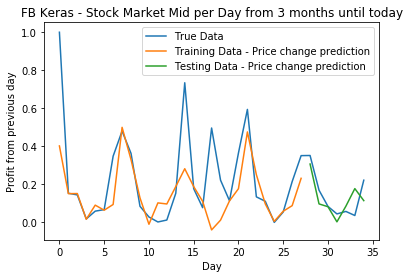

In [217]:
plotPrediction('google', train_size, model, train_X, train_y, test_X, test_y)

In [218]:
history, model, train_X, train_y, test_X, test_y = predictCompany('facebook',28)

Train on 28 samples, validate on 7 samples
Epoch 1/500
 - 1s - loss: 0.2109 - val_loss: 0.1004
Epoch 2/500
 - 0s - loss: 0.2032 - val_loss: 0.0967
Epoch 3/500
 - 0s - loss: 0.1954 - val_loss: 0.0931
Epoch 4/500
 - 0s - loss: 0.1876 - val_loss: 0.0894
Epoch 5/500
 - 0s - loss: 0.1798 - val_loss: 0.0857
Epoch 6/500
 - 0s - loss: 0.1724 - val_loss: 0.0821
Epoch 7/500
 - 0s - loss: 0.1649 - val_loss: 0.0792
Epoch 8/500
 - 0s - loss: 0.1584 - val_loss: 0.0779
Epoch 9/500
 - 0s - loss: 0.1524 - val_loss: 0.0765
Epoch 10/500
 - 0s - loss: 0.1480 - val_loss: 0.0753
Epoch 11/500
 - 0s - loss: 0.1449 - val_loss: 0.0740
Epoch 12/500
 - 0s - loss: 0.1420 - val_loss: 0.0729
Epoch 13/500
 - 0s - loss: 0.1402 - val_loss: 0.0748
Epoch 14/500
 - 0s - loss: 0.1386 - val_loss: 0.0775
Epoch 15/500
 - 0s - loss: 0.1376 - val_loss: 0.0801
Epoch 16/500
 - 0s - loss: 0.1367 - val_loss: 0.0826
Epoch 17/500
 - 0s - loss: 0.1359 - val_loss: 0.0851
Epoch 18/500
 - 0s - loss: 0.1351 - val_loss: 0.0898
Epoch 19/500

Epoch 154/500
 - 0s - loss: 0.1269 - val_loss: 0.0919
Epoch 155/500
 - 0s - loss: 0.1268 - val_loss: 0.0921
Epoch 156/500
 - 0s - loss: 0.1267 - val_loss: 0.0923
Epoch 157/500
 - 0s - loss: 0.1267 - val_loss: 0.0924
Epoch 158/500
 - 0s - loss: 0.1266 - val_loss: 0.0923
Epoch 159/500
 - 0s - loss: 0.1265 - val_loss: 0.0920
Epoch 160/500
 - 0s - loss: 0.1265 - val_loss: 0.0919
Epoch 161/500
 - 0s - loss: 0.1264 - val_loss: 0.0921
Epoch 162/500
 - 0s - loss: 0.1263 - val_loss: 0.0923
Epoch 163/500
 - 0s - loss: 0.1263 - val_loss: 0.0924
Epoch 164/500
 - 0s - loss: 0.1262 - val_loss: 0.0923
Epoch 165/500
 - 0s - loss: 0.1261 - val_loss: 0.0923
Epoch 166/500
 - 0s - loss: 0.1261 - val_loss: 0.0923
Epoch 167/500
 - 0s - loss: 0.1260 - val_loss: 0.0924
Epoch 168/500
 - 0s - loss: 0.1259 - val_loss: 0.0925
Epoch 169/500
 - 0s - loss: 0.1259 - val_loss: 0.0927
Epoch 170/500
 - 0s - loss: 0.1258 - val_loss: 0.0927
Epoch 171/500
 - 0s - loss: 0.1258 - val_loss: 0.0930
Epoch 172/500
 - 0s - loss: 

Epoch 306/500
 - 0s - loss: 0.1198 - val_loss: 0.1130
Epoch 307/500
 - 0s - loss: 0.1197 - val_loss: 0.1118
Epoch 308/500
 - 0s - loss: 0.1196 - val_loss: 0.1105
Epoch 309/500
 - 0s - loss: 0.1196 - val_loss: 0.1101
Epoch 310/500
 - 0s - loss: 0.1196 - val_loss: 0.1116
Epoch 311/500
 - 0s - loss: 0.1195 - val_loss: 0.1128
Epoch 312/500
 - 0s - loss: 0.1196 - val_loss: 0.1132
Epoch 313/500
 - 0s - loss: 0.1196 - val_loss: 0.1127
Epoch 314/500
 - 0s - loss: 0.1195 - val_loss: 0.1115
Epoch 315/500
 - 0s - loss: 0.1194 - val_loss: 0.1103
Epoch 316/500
 - 0s - loss: 0.1194 - val_loss: 0.1111
Epoch 317/500
 - 0s - loss: 0.1193 - val_loss: 0.1117
Epoch 318/500
 - 0s - loss: 0.1193 - val_loss: 0.1121
Epoch 319/500
 - 0s - loss: 0.1193 - val_loss: 0.1116
Epoch 320/500
 - 0s - loss: 0.1192 - val_loss: 0.1104
Epoch 321/500
 - 0s - loss: 0.1192 - val_loss: 0.1113
Epoch 322/500
 - 0s - loss: 0.1191 - val_loss: 0.1125
Epoch 323/500
 - 0s - loss: 0.1192 - val_loss: 0.1124
Epoch 324/500
 - 0s - loss: 

Epoch 458/500
 - 0s - loss: 0.1156 - val_loss: 0.1080
Epoch 459/500
 - 0s - loss: 0.1156 - val_loss: 0.1088
Epoch 460/500
 - 0s - loss: 0.1155 - val_loss: 0.1092
Epoch 461/500
 - 0s - loss: 0.1155 - val_loss: 0.1091
Epoch 462/500
 - 0s - loss: 0.1155 - val_loss: 0.1086
Epoch 463/500
 - 0s - loss: 0.1155 - val_loss: 0.1078
Epoch 464/500
 - 0s - loss: 0.1154 - val_loss: 0.1066
Epoch 465/500
 - 0s - loss: 0.1155 - val_loss: 0.1077
Epoch 466/500
 - 0s - loss: 0.1153 - val_loss: 0.1092
Epoch 467/500
 - 0s - loss: 0.1154 - val_loss: 0.1094
Epoch 468/500
 - 0s - loss: 0.1154 - val_loss: 0.1079
Epoch 469/500
 - 0s - loss: 0.1152 - val_loss: 0.1075
Epoch 470/500
 - 0s - loss: 0.1153 - val_loss: 0.1093
Epoch 471/500
 - 0s - loss: 0.1153 - val_loss: 0.1092
Epoch 472/500
 - 0s - loss: 0.1152 - val_loss: 0.1073
Epoch 473/500
 - 0s - loss: 0.1152 - val_loss: 0.1077
Epoch 474/500
 - 0s - loss: 0.1151 - val_loss: 0.1087
Epoch 475/500
 - 0s - loss: 0.1151 - val_loss: 0.1091
Epoch 476/500
 - 0s - loss: 

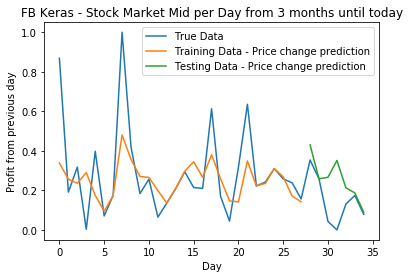

In [219]:
plotPrediction('facebook', train_size, model, train_X, train_y, test_X, test_y)

In [221]:
history, model, train_X, train_y, test_X, test_y = predictCompany('microsoft',28)

Train on 28 samples, validate on 7 samples
Epoch 1/500
 - 1s - loss: 0.3988 - val_loss: 0.3004
Epoch 2/500
 - 0s - loss: 0.3910 - val_loss: 0.2930
Epoch 3/500
 - 0s - loss: 0.3834 - val_loss: 0.2856
Epoch 4/500
 - 0s - loss: 0.3760 - val_loss: 0.2783
Epoch 5/500
 - 0s - loss: 0.3687 - val_loss: 0.2709
Epoch 6/500
 - 0s - loss: 0.3614 - val_loss: 0.2636
Epoch 7/500
 - 0s - loss: 0.3541 - val_loss: 0.2563
Epoch 8/500
 - 0s - loss: 0.3468 - val_loss: 0.2490
Epoch 9/500
 - 0s - loss: 0.3395 - val_loss: 0.2418
Epoch 10/500
 - 0s - loss: 0.3323 - val_loss: 0.2345
Epoch 11/500
 - 0s - loss: 0.3250 - val_loss: 0.2273
Epoch 12/500
 - 0s - loss: 0.3178 - val_loss: 0.2200
Epoch 13/500
 - 0s - loss: 0.3110 - val_loss: 0.2128
Epoch 14/500
 - 0s - loss: 0.3042 - val_loss: 0.2056
Epoch 15/500
 - 0s - loss: 0.2974 - val_loss: 0.1984
Epoch 16/500
 - 0s - loss: 0.2906 - val_loss: 0.1912
Epoch 17/500
 - 0s - loss: 0.2839 - val_loss: 0.1840
Epoch 18/500
 - 0s - loss: 0.2771 - val_loss: 0.1768
Epoch 19/500

Epoch 154/500
 - 0s - loss: 0.1791 - val_loss: 0.1010
Epoch 155/500
 - 0s - loss: 0.1789 - val_loss: 0.1008
Epoch 156/500
 - 0s - loss: 0.1788 - val_loss: 0.1006
Epoch 157/500
 - 0s - loss: 0.1786 - val_loss: 0.1004
Epoch 158/500
 - 0s - loss: 0.1785 - val_loss: 0.1002
Epoch 159/500
 - 0s - loss: 0.1784 - val_loss: 0.1000
Epoch 160/500
 - 0s - loss: 0.1782 - val_loss: 0.0998
Epoch 161/500
 - 0s - loss: 0.1781 - val_loss: 0.0996
Epoch 162/500
 - 0s - loss: 0.1779 - val_loss: 0.0994
Epoch 163/500
 - 0s - loss: 0.1778 - val_loss: 0.0992
Epoch 164/500
 - 0s - loss: 0.1776 - val_loss: 0.0990
Epoch 165/500
 - 0s - loss: 0.1775 - val_loss: 0.0988
Epoch 166/500
 - 0s - loss: 0.1773 - val_loss: 0.0986
Epoch 167/500
 - 0s - loss: 0.1771 - val_loss: 0.0983
Epoch 168/500
 - 0s - loss: 0.1770 - val_loss: 0.0981
Epoch 169/500
 - 0s - loss: 0.1768 - val_loss: 0.0979
Epoch 170/500
 - 0s - loss: 0.1767 - val_loss: 0.0977
Epoch 171/500
 - 0s - loss: 0.1765 - val_loss: 0.0974
Epoch 172/500
 - 0s - loss: 

Epoch 306/500
 - 0s - loss: 0.1455 - val_loss: 0.0802
Epoch 307/500
 - 0s - loss: 0.1453 - val_loss: 0.0808
Epoch 308/500
 - 0s - loss: 0.1451 - val_loss: 0.0817
Epoch 309/500
 - 0s - loss: 0.1449 - val_loss: 0.0831
Epoch 310/500
 - 0s - loss: 0.1448 - val_loss: 0.0839
Epoch 311/500
 - 0s - loss: 0.1447 - val_loss: 0.0842
Epoch 312/500
 - 0s - loss: 0.1445 - val_loss: 0.0839
Epoch 313/500
 - 0s - loss: 0.1443 - val_loss: 0.0832
Epoch 314/500
 - 0s - loss: 0.1442 - val_loss: 0.0832
Epoch 315/500
 - 0s - loss: 0.1441 - val_loss: 0.0838
Epoch 316/500
 - 0s - loss: 0.1440 - val_loss: 0.0850
Epoch 317/500
 - 0s - loss: 0.1438 - val_loss: 0.0867
Epoch 318/500
 - 0s - loss: 0.1437 - val_loss: 0.0877
Epoch 319/500
 - 0s - loss: 0.1438 - val_loss: 0.0870
Epoch 320/500
 - 0s - loss: 0.1435 - val_loss: 0.0859
Epoch 321/500
 - 0s - loss: 0.1434 - val_loss: 0.0853
Epoch 322/500
 - 0s - loss: 0.1434 - val_loss: 0.0851
Epoch 323/500
 - 0s - loss: 0.1434 - val_loss: 0.0862
Epoch 324/500
 - 0s - loss: 

Epoch 458/500
 - 0s - loss: 0.1349 - val_loss: 0.1111
Epoch 459/500
 - 0s - loss: 0.1348 - val_loss: 0.1111
Epoch 460/500
 - 0s - loss: 0.1347 - val_loss: 0.1112
Epoch 461/500
 - 0s - loss: 0.1347 - val_loss: 0.1114
Epoch 462/500
 - 0s - loss: 0.1347 - val_loss: 0.1117
Epoch 463/500
 - 0s - loss: 0.1347 - val_loss: 0.1117
Epoch 464/500
 - 0s - loss: 0.1346 - val_loss: 0.1116
Epoch 465/500
 - 0s - loss: 0.1346 - val_loss: 0.1118
Epoch 466/500
 - 0s - loss: 0.1345 - val_loss: 0.1124
Epoch 467/500
 - 0s - loss: 0.1346 - val_loss: 0.1128
Epoch 468/500
 - 0s - loss: 0.1346 - val_loss: 0.1128
Epoch 469/500
 - 0s - loss: 0.1346 - val_loss: 0.1126
Epoch 470/500
 - 0s - loss: 0.1344 - val_loss: 0.1122
Epoch 471/500
 - 0s - loss: 0.1345 - val_loss: 0.1126
Epoch 472/500
 - 0s - loss: 0.1343 - val_loss: 0.1132
Epoch 473/500
 - 0s - loss: 0.1343 - val_loss: 0.1135
Epoch 474/500
 - 0s - loss: 0.1344 - val_loss: 0.1135
Epoch 475/500
 - 0s - loss: 0.1343 - val_loss: 0.1133
Epoch 476/500
 - 0s - loss: 

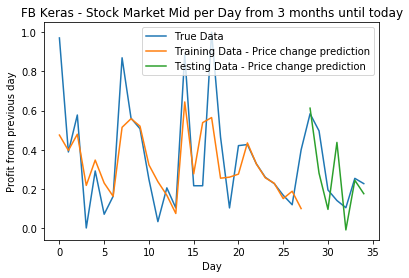

In [222]:
plotPrediction('microsoft', train_size, model, train_X, train_y, test_X, test_y)

In [223]:
history, model, train_X, train_y, test_X, test_y = predictCompany('uber',28)

Train on 28 samples, validate on 7 samples
Epoch 1/500
 - 1s - loss: 0.3934 - val_loss: 0.4712
Epoch 2/500
 - 0s - loss: 0.3873 - val_loss: 0.4650
Epoch 3/500
 - 0s - loss: 0.3803 - val_loss: 0.4585
Epoch 4/500
 - 0s - loss: 0.3729 - val_loss: 0.4514
Epoch 5/500
 - 0s - loss: 0.3647 - val_loss: 0.4445
Epoch 6/500
 - 0s - loss: 0.3569 - val_loss: 0.4376
Epoch 7/500
 - 0s - loss: 0.3491 - val_loss: 0.4306
Epoch 8/500
 - 0s - loss: 0.3412 - val_loss: 0.4236
Epoch 9/500
 - 0s - loss: 0.3332 - val_loss: 0.4166
Epoch 10/500
 - 0s - loss: 0.3252 - val_loss: 0.4096
Epoch 11/500
 - 0s - loss: 0.3174 - val_loss: 0.4025
Epoch 12/500
 - 0s - loss: 0.3099 - val_loss: 0.3955
Epoch 13/500
 - 0s - loss: 0.3027 - val_loss: 0.3885
Epoch 14/500
 - 0s - loss: 0.2956 - val_loss: 0.3815
Epoch 15/500
 - 0s - loss: 0.2885 - val_loss: 0.3745
Epoch 16/500
 - 0s - loss: 0.2815 - val_loss: 0.3676
Epoch 17/500
 - 0s - loss: 0.2752 - val_loss: 0.3607
Epoch 18/500
 - 0s - loss: 0.2696 - val_loss: 0.3540
Epoch 19/500

Epoch 154/500
 - 0s - loss: 0.1529 - val_loss: 0.1947
Epoch 155/500
 - 0s - loss: 0.1527 - val_loss: 0.1950
Epoch 156/500
 - 0s - loss: 0.1525 - val_loss: 0.1952
Epoch 157/500
 - 0s - loss: 0.1523 - val_loss: 0.1955
Epoch 158/500
 - 0s - loss: 0.1521 - val_loss: 0.1959
Epoch 159/500
 - 0s - loss: 0.1519 - val_loss: 0.1963
Epoch 160/500
 - 0s - loss: 0.1517 - val_loss: 0.1967
Epoch 161/500
 - 0s - loss: 0.1514 - val_loss: 0.1971
Epoch 162/500
 - 0s - loss: 0.1512 - val_loss: 0.1975
Epoch 163/500
 - 0s - loss: 0.1510 - val_loss: 0.1979
Epoch 164/500
 - 0s - loss: 0.1508 - val_loss: 0.1983
Epoch 165/500
 - 0s - loss: 0.1506 - val_loss: 0.1987
Epoch 166/500
 - 0s - loss: 0.1504 - val_loss: 0.1991
Epoch 167/500
 - 0s - loss: 0.1502 - val_loss: 0.1995
Epoch 168/500
 - 0s - loss: 0.1499 - val_loss: 0.1999
Epoch 169/500
 - 0s - loss: 0.1497 - val_loss: 0.2003
Epoch 170/500
 - 0s - loss: 0.1495 - val_loss: 0.2006
Epoch 171/500
 - 0s - loss: 0.1492 - val_loss: 0.2012
Epoch 172/500
 - 0s - loss: 

Epoch 306/500
 - 0s - loss: 0.1270 - val_loss: 0.2445
Epoch 307/500
 - 0s - loss: 0.1270 - val_loss: 0.2435
Epoch 308/500
 - 0s - loss: 0.1269 - val_loss: 0.2436
Epoch 309/500
 - 0s - loss: 0.1268 - val_loss: 0.2446
Epoch 310/500
 - 0s - loss: 0.1268 - val_loss: 0.2442
Epoch 311/500
 - 0s - loss: 0.1267 - val_loss: 0.2440
Epoch 312/500
 - 0s - loss: 0.1267 - val_loss: 0.2444
Epoch 313/500
 - 0s - loss: 0.1266 - val_loss: 0.2449
Epoch 314/500
 - 0s - loss: 0.1266 - val_loss: 0.2441
Epoch 315/500
 - 0s - loss: 0.1265 - val_loss: 0.2439
Epoch 316/500
 - 0s - loss: 0.1265 - val_loss: 0.2442
Epoch 317/500
 - 0s - loss: 0.1264 - val_loss: 0.2450
Epoch 318/500
 - 0s - loss: 0.1264 - val_loss: 0.2447
Epoch 319/500
 - 0s - loss: 0.1263 - val_loss: 0.2450
Epoch 320/500
 - 0s - loss: 0.1262 - val_loss: 0.2442
Epoch 321/500
 - 0s - loss: 0.1263 - val_loss: 0.2445
Epoch 322/500
 - 0s - loss: 0.1263 - val_loss: 0.2456
Epoch 323/500
 - 0s - loss: 0.1261 - val_loss: 0.2465
Epoch 324/500
 - 0s - loss: 

Epoch 458/500
 - 0s - loss: 0.1214 - val_loss: 0.2527
Epoch 459/500
 - 0s - loss: 0.1213 - val_loss: 0.2525
Epoch 460/500
 - 0s - loss: 0.1213 - val_loss: 0.2531
Epoch 461/500
 - 0s - loss: 0.1213 - val_loss: 0.2523
Epoch 462/500
 - 0s - loss: 0.1212 - val_loss: 0.2517
Epoch 463/500
 - 0s - loss: 0.1212 - val_loss: 0.2521
Epoch 464/500
 - 0s - loss: 0.1212 - val_loss: 0.2515
Epoch 465/500
 - 0s - loss: 0.1212 - val_loss: 0.2510
Epoch 466/500
 - 0s - loss: 0.1212 - val_loss: 0.2507
Epoch 467/500
 - 0s - loss: 0.1212 - val_loss: 0.2514
Epoch 468/500
 - 0s - loss: 0.1211 - val_loss: 0.2510
Epoch 469/500
 - 0s - loss: 0.1210 - val_loss: 0.2509
Epoch 470/500
 - 0s - loss: 0.1210 - val_loss: 0.2509
Epoch 471/500
 - 0s - loss: 0.1210 - val_loss: 0.2504
Epoch 472/500
 - 0s - loss: 0.1210 - val_loss: 0.2503
Epoch 473/500
 - 0s - loss: 0.1210 - val_loss: 0.2505
Epoch 474/500
 - 0s - loss: 0.1210 - val_loss: 0.2493
Epoch 475/500
 - 0s - loss: 0.1210 - val_loss: 0.2492
Epoch 476/500
 - 0s - loss: 

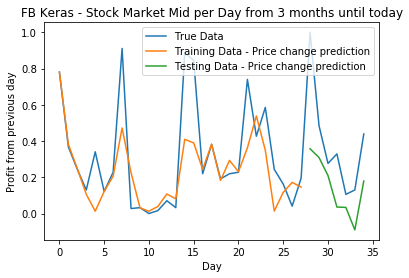

In [224]:
plotPrediction('uber', train_size, model, train_X, train_y, test_X, test_y)